# Introduction to the - Concrete Strength Dataset.
# Objective:
Analyze the concrete_data.csv dataset to understand the factors influencing concrete compressive strength.
Build predictive models to estimate concrete compressive strength based on input features.
# Dataset Overview:
The dataset contains information about various components and properties of concrete.
# Features include:
Cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, fine aggregate, and age.
Target variable: concrete_compressive_strength.
# Key Questions:
What are the most influential factors affecting concrete compressive strength?
How do different components interact with each other to impact the target variable?
# Approach:
Perform exploratory data analysis (EDA) to uncover patterns, trends, and relationships in the data.
Visualize feature distributions, correlations, and trends using histograms, box plots, and scatter plots.
Preprocess the data by handling missing values, normalizing features, and preparing it for modeling.
Train machine learning models, such as Linear Regression, to predict concrete compressive strength.
# Applications:
Insights from this analysis can help optimize concrete mixtures for better performance and durability.
Predictive models can assist engineers in designing cost-effective and high-strength concrete formulations.
# Expected Outcomes:
Identification of key drivers of concrete compressive strength.
A trained predictive model capable of estimating concrete strength based on input features.
Recommendations for improving concrete composition based on data-driven insights.

# References:
Main Source => https://www.kaggle.com/datasets/elikplim/concrete-compressive-strength-data-set

Kaggle => https://www.kaggle.com/code/vishwaaradhyamath/concreate-eda-regression-ipynb

GitHub => https://github.com/vmaradhya2020/DataVisualizationEDA/blob/main/concreate_EDA_regression.ipynb

In [12]:
# Step 1: Setup and Data Preparation
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Load the dataset
df = pd.read_csv('/content/sample_data/concrete_data.csv')
# df = pd.read_csv('/kaggle/input/concrete-compressive-strength-data-set/concrete_data.csv')

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

First 5 rows of the dataset:
   cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
0            1040.0            676.0   28                          79.99  
1            1055.0            676.0   28                          61.89  
2             932.0            594.0  270                          40.27  
3             932.0            594.0  365                          41.05  
4             978.4            825.5  360                          44.30  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns

In [14]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# If there are missing values, handle them using appropriate strategies
# Example: Fill missing values with column mean
df.fillna(df.mean(), inplace=True)

# Verify no missing values remain
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values:
cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

Missing Values After Handling:
cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64


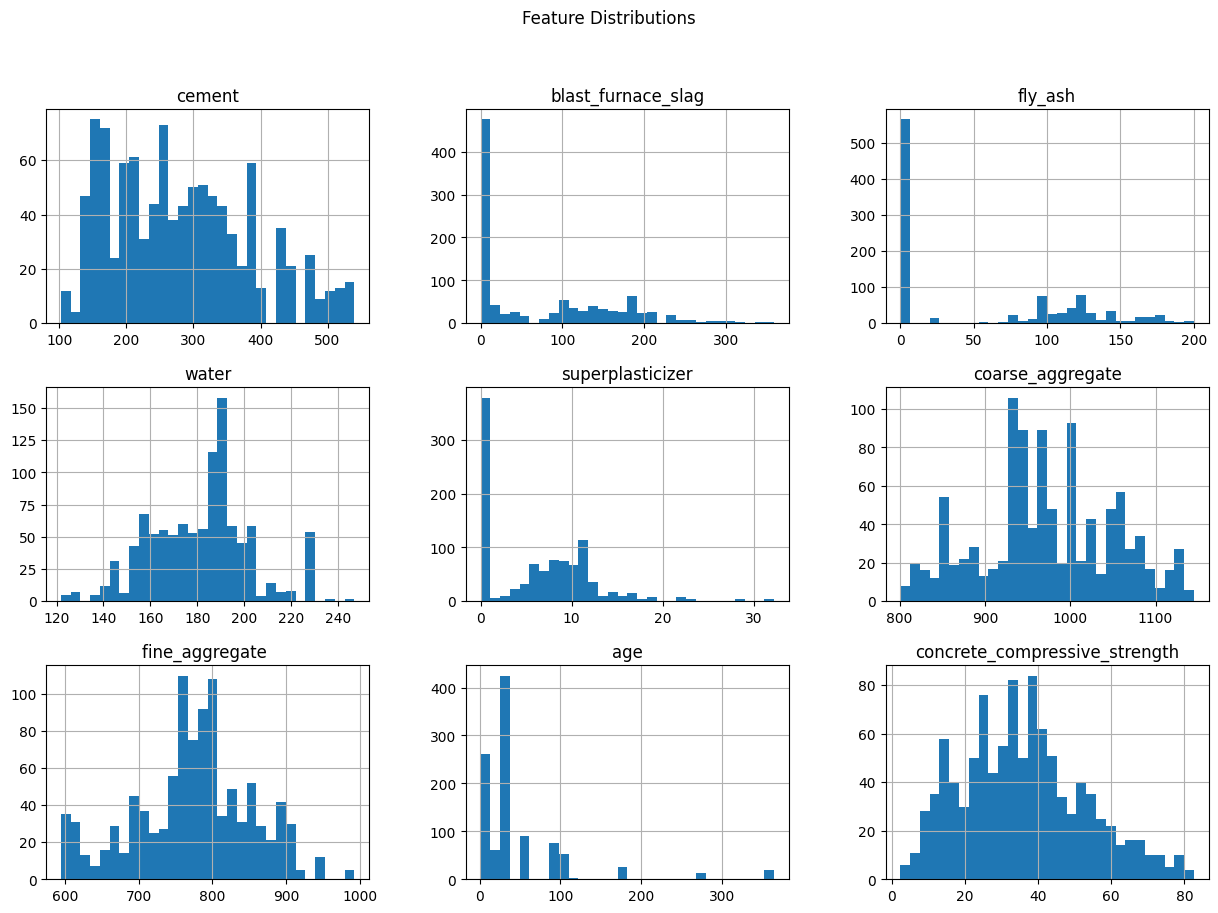

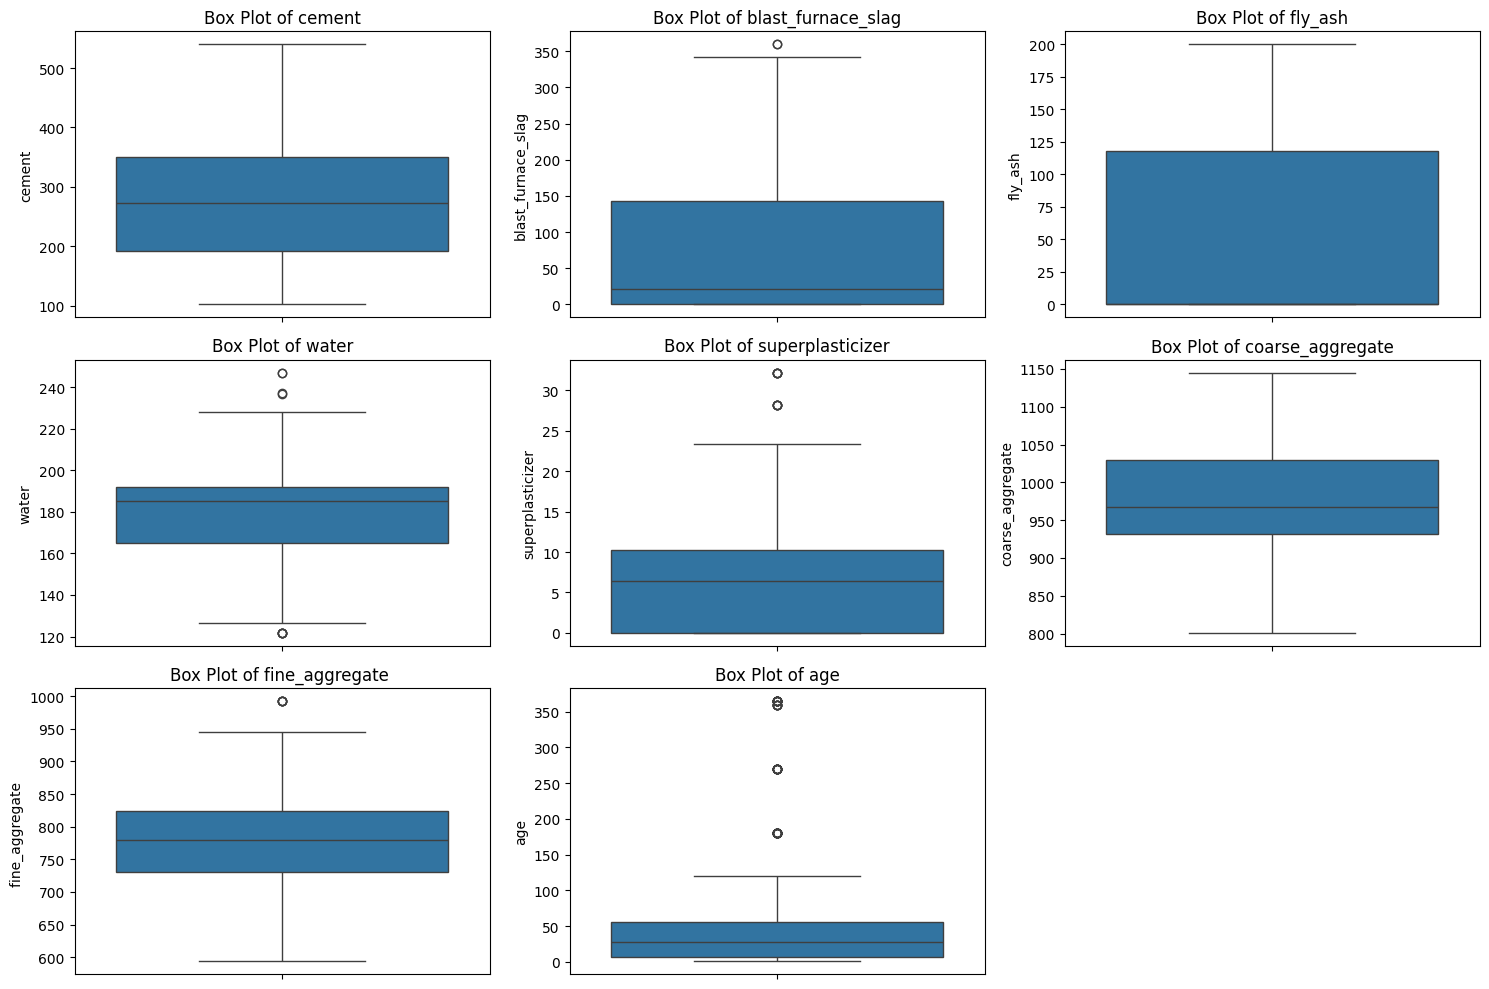

In [15]:
# Step 2: Exploratory Data Analysis (EDA)
# Visualize Feature Distributions
# Histograms for numerical features
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()

# Box plots to detect outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):  # Exclude the target variable
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, y=column)
    plt.title(f"Box Plot of {column}")
plt.tight_layout()
plt.show()

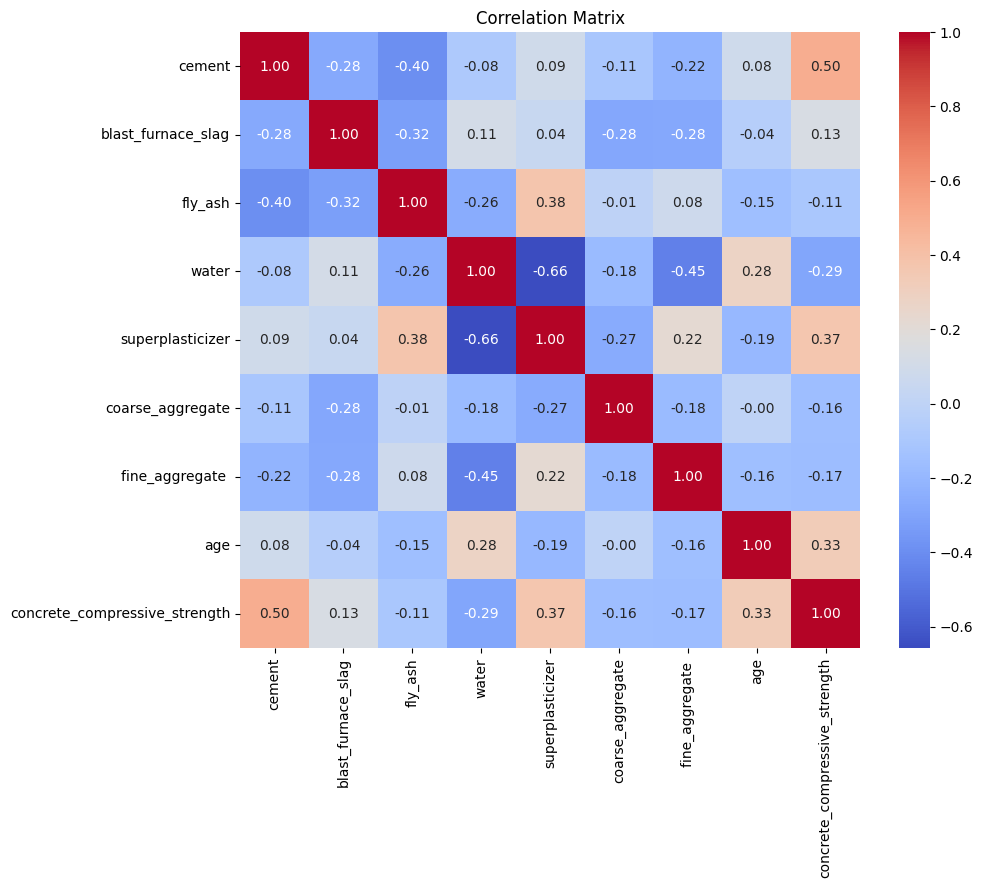

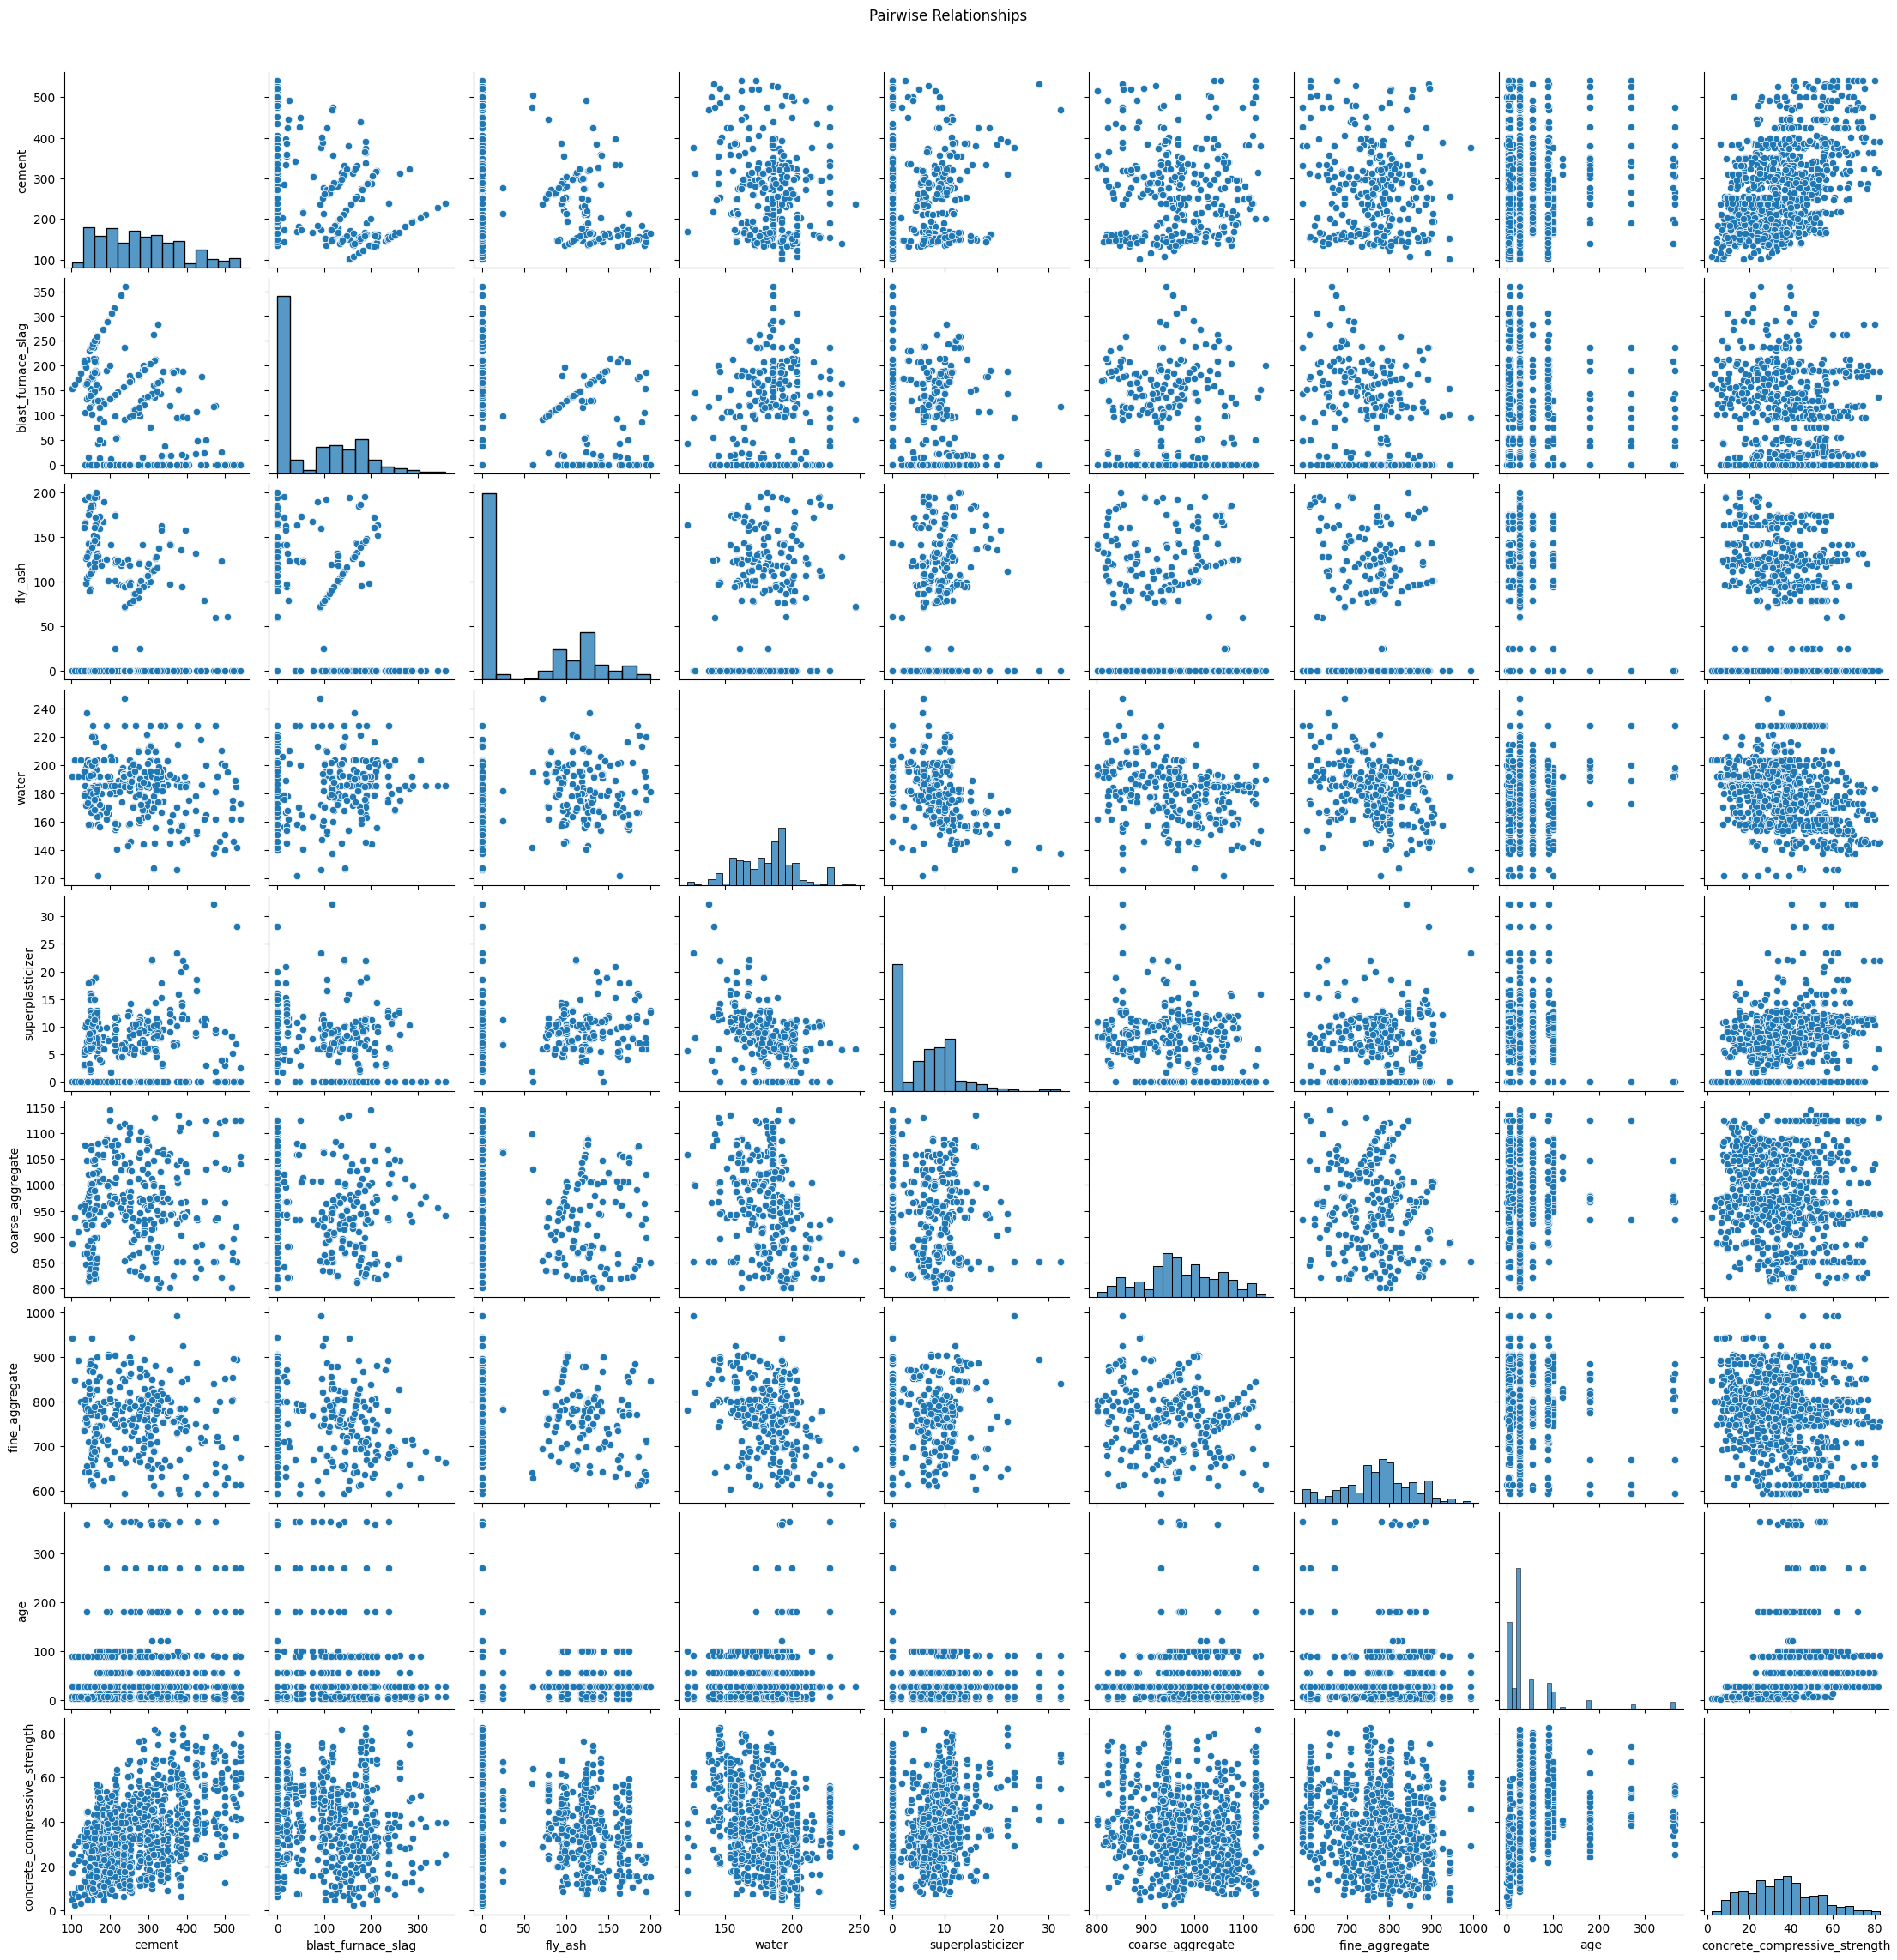

In [16]:
# Assess Relationships Between Numerical Variables
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Scatter plots for key relationships
sns.pairplot(df)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


In [17]:
# Step 3: Preprocessing Steps
# Normalization ensures all features are on the same scale, which can improve model performance:
from sklearn.preprocessing import StandardScaler

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['concrete_compressive_strength']))
y = df['concrete_compressive_strength']

# Convert back to DataFrame for clarity
X_scaled = pd.DataFrame(X_scaled, columns=df.columns[:-1])
print("\nNormalized Features:")
print(X_scaled.head())


Normalized Features:
     cement  blast_furnace_slag   fly_ash     water  superplasticizer  \
0  2.477915           -0.856888 -0.847144 -0.916764         -0.620448   
1  2.477915           -0.856888 -0.847144 -0.916764         -0.620448   
2  0.491425            0.795526 -0.847144  2.175461         -1.039143   
3  0.491425            0.795526 -0.847144  2.175461         -1.039143   
4 -0.790459            0.678408 -0.847144  0.488793         -1.039143   

   coarse_aggregate  fine_aggregate        age  
0          0.863154        -1.217670 -0.279733  
1          1.056164        -1.217670 -0.279733  
2         -0.526517        -2.240917  3.553066  
3         -0.526517        -2.240917  5.057677  
4          0.070527         0.647884  4.978487  


In [18]:
# Split the Data into Training and Testing Sets
# Define features (X) and target (y)
X = X_scaled
y = df['concrete_compressive_strength']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (824, 8)
Testing Set Shape: (206, 8)


In [19]:
# Step 4: Model Building and Evaluation
# Train a Linear Regression Model.
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Model Evaluation:
Mean Squared Error (MSE): 95.97
R-squared (R2): 0.63


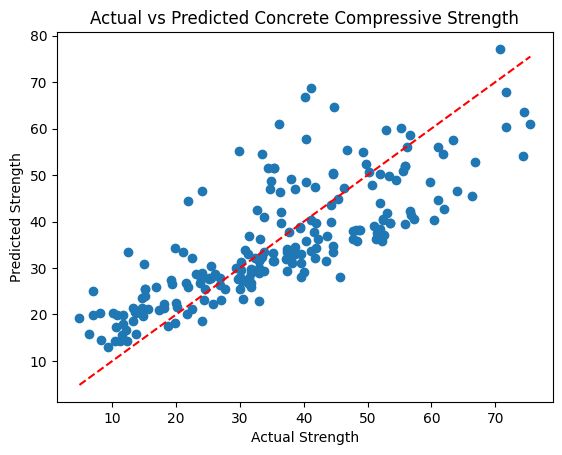

In [20]:
# Visualize Actual vs Predicted Values
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title("Actual vs Predicted Concrete Compressive Strength")
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.show()


Feature Importance:
              Feature  Coefficient
0              cement    12.429585
1  blast_furnace_slag     9.359833
7                 age     7.351847
2             fly_ash     5.254917
6     fine_aggregate      1.931285
4    superplasticizer     1.854395
5    coarse_aggregate     1.388567
3               water    -2.887316


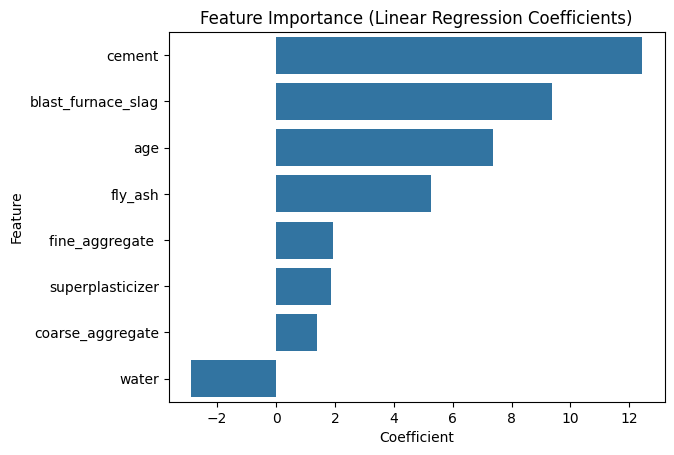

In [21]:
# Step 5: Feature Importance
# Extract and visualize the coefficients from the Linear Regression model to understand the impact of each feature on the target variable.
# Coefficients from the Linear Regression model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance:")
print(coefficients)

# Plot feature importance
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

# Step 6: Summary of Insights.

# Key Observations and Feature Distributions:
Most features are positively skewed, indicating non-normal distributions.
Outliers are present in several features (e.g., cement, water).
# Correlations:
Strong positive correlations between cement and concrete_compressive_strength.
Moderate correlations between age and concrete_compressive_strength.
# Outliers:
Outliers detected in several features (e.g., superplasticizer, coarse_aggregate).
# Missing Values:
No missing values were found in the dataset.
Influential Variables
cement, blast_furnace_slag, and age appear to have significant impacts on concrete_compressive_strength.
Recommendations
# Data Transformation:
Apply log transformations to reduce skewness in certain features.
# Modeling:
Use regression models like Linear Regression, Random Forest, or Gradient Boosting to predict concrete_compressive_strength.
Feature Engineering :
Create interaction terms or polynomial features to capture non-linear relationships.